## Coordinates

Different coordinate systems are frequently used in acoustics research and
handling sampling points and different systems can be cumbersome. The
:py:func:`Coordinates class <pyfar.classes.coordinates.Coordinates>` was
designed for storing, manipulating, and accessing coordinate points. 
It can convert between coordinate systems and
rotate, query and plot coordinates points. Examples for data that can be stored are microphone positions of a spherical microphone array and loudspeaker positions of a sound field synthesis system. Lets create an empty `Coordinates` object.

In [1]:
import pyfar as pf
import numpy as np
c = pf.Coordinates()

### Entering coordinate points

Coordinate points can be entered manually. Internally the points are saved in cartesian coordinate system. 

1D Coordinates object with 11 points of cshape (11,)
domain: cart, convention: right, unit: met
coordinates: x in meters, y in meters, z in meters
Does not contain sampling weights


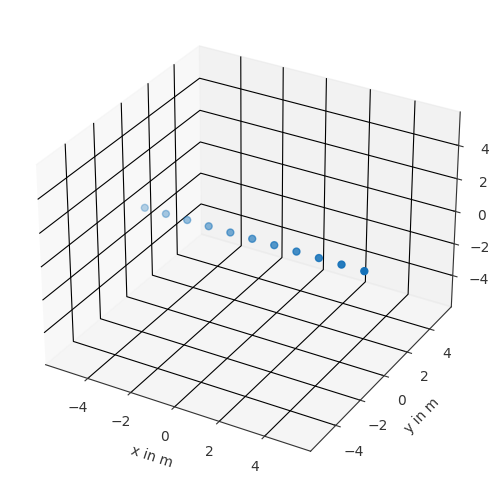

In [2]:
c = pf.Coordinates(np.arange(-5., 6), 0, 0)
# show general information
print(c)
# plot the sampling points
c.show()

It is also possible to create a Coordinates object in other coordinate systems. In the image you can see all supported coordinate systems.

![alt text](../docs/concepts/resources/coordinate_systems.png)


To initialize `Coordinate` objects for other coordinate systems use the their constructor like `pf.Coordinates.from_spherical_elevation(azimuth, elevation, radius)`.
The naming is always as follows `pf.Coordinates.from_coordinate_system(red, green, blue)` where `coordinate_system` need to replaced by the desired coordinate system, red, green, blue describe the order of the coordinate properties. Angles are always defined in radiance.

is the `pf.Coordinates(x, y, z)` constructor or for other coordinate systems classmethods like `pf.Coordinates.from_spherical_elevation(azimuth, elevation, radius)`. Visit the [coordinate class](https://pyfar.readthedocs.io/en/latest/classes/pyfar.coordinates.html) for more datails.

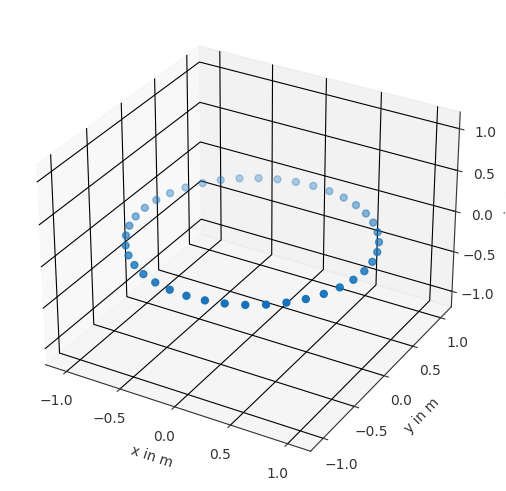

In [22]:
import matplotlib.pyplot as plt
azimuth_angles = np.arange(0, 2*np.pi, np.pi/20)
c1 = pf.Coordinates.from_spherical_elevation(azimuth_angles, 0, 1)
c1.show()
plt.show()

Inside the `Coordinates` object, the Coordinates are stored in a cartesian coordinate system for each `x`, `y` and `z`. Information about coordinate array can be obtained by `c.cshape`, `c.csize`, and `c.cdim`. These properties are similar to numpy's `shape`, `size`, and `dim` of each `x`, `y` and `z`.
Additionally we can use available sampling schemes contained in https://spharpy.readthedocs.io/en/latest/spharpy.samplings.html.

### Retrieving coordinate points

There are different ways to retrieve points from a `Coordinates` object. All points can be obtained in cartesian, spherical, and cylindrical coordinates using the related properties `c.cartesian`, `c.sperical_evaluation` and `c.cylindrical`. Also single properties of each coordinate system convention can be accessed by e.g. `c.azimuth`, `c.radius` or `c.x`. Visit the [coordinate class](https://pyfar.readthedocs.io/en/latest/classes/pyfar.coordinates.html) for more details."

In [4]:
cartesian_coordinates = c.cartesian

Different methods are available for obtaining a specific subset of coordinates. For example, the nearest `k` point(s) can be obtained by

In [5]:
find = pf.Coordinates.from_spherical_colatitude(270/180*np.pi, 90/180*np.pi, 1)
index_out, distance = c.find_nearest(find, k=1)
c.show(index_out)

Another option is to find all points in a certain area around different points. Different distance measures are available.

In [6]:
index_out = c.find_within(find, distance=3, distance_measure='euclidean')
c.show(index_out)

To obtain all points within a specified euclidean distance or arc distance, you can use `c.get_nearest_cart()` and `c.get_nearest_sph()`. To obtain more complicated subsets of any coordinate, e.g., the horizontal plane with `colatitude=90` degree, you can use

In [7]:
index_out = c.colatitude == 90/180*np.pi
c.show(index_out)

### Rotating coordinates

You can apply rotations using quaternions, rotation vectors/matrixes and euler angles with  `c.rotate()`, which is a wrapper for `scipy.spatial.transform.Rotation`. For example rotating around the y-axis by 45 degrees can be done with

In [8]:
c.rotate('y', 45)
c.show()

Note that this changes the points inside the `Coordinates` object, which means that you have to be careful not to apply the rotation multiple times, i.e., when evaluationg cells during debugging.

## Orientations

The `Orientations()` class is designed for storing, manipulating, and accessing orientation vectors. Examples for this are orientations of directional loudspeakers during measurements or head orientations. It is good to know that `Orientations` is inherited from `scipy.spatial.transform.Rotation` and that all methods of this class can also be used with `Orientations`.

### Entering orientations

Lets go ahead and create an object and show the result

In [9]:
views = [[0,  1, 0],
         [1,  0, 0],
         [0, -1, 0]]
up = [0, 0, 1]
orientations = pf.Orientations.from_view_up(views, up)
orientations.show(show_rights=False)


It is also possible to enter `Orientations` from `Coordinates` object or mixtures of `Coordinates` objects and array likes. This is equivalent to the example above

In [10]:
azimuths = np.array([90, 0, 270]) * np.pi / 180
views_c = pf.Coordinates.from_spherical_elevation(azimuths, 0, 1)

orientations = pf.Orientations.from_view_up(views_c, up)

### Retrieving orientations

Orientaions can be retrieved as view, up, and right-vectors and in any format supported by `scipy.spatial.transform.Rotation`. They can also be converted into any coordinate convention supported by pyfar by putting them into a `Coordinates` object. Lets only check out one way for now 

In [11]:
views, ups, right, = orientations.as_view_up_right()
views

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0., -1.,  0.]])

### Rotating orientations

Rotations can be done using the methods inherited from `scipy.spatial.transform.Rotation`. You can for example rotate around the y-axis this way

In [12]:
rotation = pf.Orientations.from_euler('y', 30, degrees=True)
orientations_rot = orientations * rotation
orientations_rot.show(show_rights=False)